# Titanic: Machine Learning from Disaster

https://www.kaggle.com/c/titanic

https://www.kaggle.com/startupsci/titanic-data-science-solutions/notebook

## 作業ステージ

問題解決の流れは、以下の7つのステージに沿って作業を行うことである。

1. 問題の特定
2. トレーニングデータとテストデータの取得
3. データの事前処理
4. 特徴的なデータのパターンを分析
5. モデル化と予測により問題を解く
6. 可視化やレポートを生成し最終的な解決策を示す
7. 結果を提出する

ただし、以下のような例外がある。

* 複数の作業ステージをまとめて行う場合がある。データの可視化によってデータを分析する場合がある。
* 後続のステージを前に実施する場合がある。データ整形の前にデータを分析する場合がある。
* 1つのステージを複数回実施する場合がある。可視化のステージは複数回実施される場合がある。
* 実施する必要のないステージがある場合がある。結果を提出するステージは行わない場合がある。

## 問題の特定

タイタニックの事故で生き残った人とそうでなかった人のサンプル情報を利用しモデルを構築し、与えられたテストデータセットを使いその乗客達が生き残ったかどうかを判断する。

Kaggleの記載により以下のことがわかる

- 1912年の4月15日にタイタニック号は氷河に衝突して沈没した。2224人の乗客と乗務員のうち1502人が亡くなった。生存率は32%である
- これほど多くの命を奪った一つの理由は、乗客と乗組員にとって十分なライフボードが搭載していなかったことにある。
- 運の側面もあるがいくつかのグループの人々は生き残ったようである。例えば、女性や子供やハイクラスの人々。

## 作業のゴール

**分類**

**相関関係**

**変換**

**欠損値の補完**

**修正**

**作成**

**表示**


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## トレーニングデータとテストデータの取得

In [2]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
combine = [train_df, test_df]

## 特徴量を把握する

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- Pclass : Class of Travel
- Name : Name of Passenger
- Sex : Gender
- SibSp : Number of Sibling/Spouse abord
- Parch : Number of Parent/Child aboard
- Embarked : The port in which a passenger has embarked. C - Cherbourg, S - Southhampton, Q - Queenstown

## データセットをざっと見て考える

In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 欠損値がないか調べる

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


- Ticketは、数字と英数字のデータタイプが混在している。
- CabinやAgeに欠損値(NaN)がある。

### データセットの情報

In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

## 統計量を確認

### データセットでは数値タイプの特徴量の分布はどうなっているのか？

In [7]:
# 数値データに対して各種統計量を計算
# count: 要素数, mean: 算術平均, std: 標準偏差, min: 最小値, 50%: 中央値, max: 最大値
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- トレーニングデータセットの合計は891。タイタニック号に搭乗した乗客の実際の数(2,224)の40%。
- Survivied は、0または1の値をもつカテゴリカル特徴量。
- トレーニングデータセットの約38%が生き残った。(実際は、乗客が2224人で1502人が死んだので、約32%が生き残った。)
- ほとんどの状況 (> 75%) は、親または子供と一緒に旅行しなかった。
- 乗客のほぼ30%が兄弟姉妹や配偶者を乗せていた。
- 運賃は、一部の乗客 (< 1%) だけ異常に高く、512ドル払っていた。
- 65歳から80歳までの高齢者はほとんどのっていなかった (< 1%) 。

### カテゴリカル特徴量の分布は？

In [8]:
# オブジェクト要素の基本統計量も算出
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Leonard, Mr. Lionel",male,CA. 2343,G6,S
freq,1,577,7,4,644


* Nameは、データセット全体で一意。 (count = unique = 891)
* 65%が男性。 (tp = male, freq = 577 / count = 891) (freq: 出現回数)
* 客室の値はいくつかのトレーニングデータで2重になっている。あるいは、複数の状況が客室を共有した。
* Embarkedは、3つの値をとる可能性があるが、ほとんどの乗客がS港から乗船していた。 (top=S)
* Ticket特徴量では、重複した値 (unique = 681)の割合が22%と高い。

## データから考えられる仮説を立てる

**相関関係**

「Survived」を予測したい(0: 亡くなった, 1: 生存した)ので、各特徴量がどのように「Survived」に相関しているかが知りたい。プロジェクトの早い男系でこの作業を行い、プロジェクトの後半でモデルかされた相関関係と仮説で考えた相関関係を一致させたい。

**欠損値の補完**

1. Survivedと明らかに相関があるため、ageの欠損値はなんらかの手段を用いて補完する必要があるかもしれない。
2. Survivedまたは他の重要な特徴量と相関する可能性があるため、Embarkedの欠損値も補完する必要があるかもしれない。

**修正**

1. 重複率(22%)が高く、TicketとSurvivedの間に相関がない可能性があるので、Ticket特徴量は分析から除外される可能性がある。
2. Cabin特徴量は、トレーニングデータとテストデータ・セットの両方で非常に不完全であるか、または多くのnull値を含んでいるため、削除される可能性がある。
3. Survivedに寄与したないため、Passengeridはトレーニングデータ・セットから削除される可能性がある。
4. nameの特徴量は比較的非標準であり、Survivedに直接貢献しない可能性がある。

**作成**

1. ParchとSibSpに基づいてFamilyという新しい特徴量を作成し、家族の総数を取得したい場合がある。
2. Name特徴量を使用して、Titleを新しい特徴量として抽出すると良いかも。
3. Age特徴量ではある程度の幅を表した新しい特徴量を作成したい場合がある。これは、連続的な数値特徴量を順序尺度のカテゴリカル特徴量に変えることで扱いやすくなるためである。
4. 分析に役立つ場合は、Ageと同じようにFareの範囲を特徴量として作成することもできる。

**予測するのに重要と思われる特徴量**

1. 女性 (性別=女性) は生存していた可能性が高い。
2. 子供 (年齢 < ?) は生存していた可能性が高い。
3. 上位クラスの乗客は生き残った可能性が高い。

## 特徴量の相関を解析する

仮説の一部を確認するために、特徴量のSurvivedとの相関関係を分析する。

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- **Pclass** 

 Pclass=1とSurvivedの間に有意な相関(>0.5)が観測された。この特徴量をモデルに含めることにする。


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- **性別**

 女性のSurvived率が74%で非常に高いという仮説が正しいことが確認できた。

In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- **SlibSpとParch**

 これらの特徴は、特定の値では相関がない。

## データを視覚化して解析する

### 数値特徴量の相関

数値得象量とSurvivedとの相関を理解することから始める。

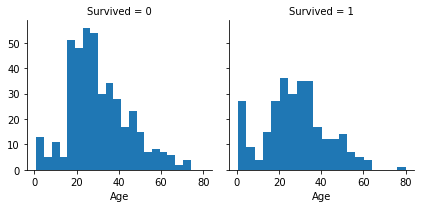

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**観察**

- 幼児(Age <= 4歳)は、高い生存率を示した。
- 最も年老いた乗客(Age = 80歳)が生き残った。
- 15から25歳の多くは生き残れなかった。
- ほとんどの乗客は15から35歳の範囲にある。

**結論**

この単純な分析により仮説が正しいと確認でき、後続の分析で用いることができる。

- モデルのトレーニングでAgeを考慮する必要がある。
- null値のAgeを補完する。
- Age特徴量では、ある程度の幅で表された新しい特徴量を作成する。

### 数値と順序尺度の特徴量の相関

1つのプロットを使用して相関を識別する複数の特徴量を組み合わせることができる。これは、数値とカテゴリカル特徴量を用いて行う。

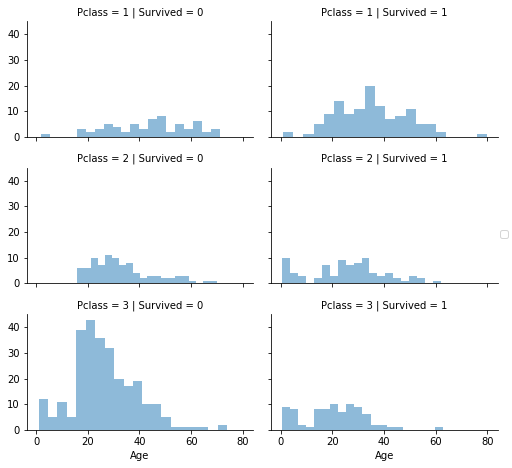

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**観察**

- Pclass=3のほとんどの乗客は生き残れなかった。
- Pclass=2およびPclass3の幼児の乗客はほとんどが生き残った。(仮説2「子供は(年齢<?)は生存していた可能性が高い」を実証した）
- Pclass=1のほとんどの状況は生き残った。(仮説3「上位クラスの乗客(Pclass=1)は生き残った可能性が高い」を実証した）
- Pclassは、乗客の年齢分布によって異なる。

**結論**

- モデルをトレーニングするためにPclassを考慮する。

### カテゴリカル特徴量の相関

カテゴリカル特徴量と応答変数(Survived)の関係を分析する。これは、数値の値をもつカテゴリカル特徴量と数値特徴量に対して行う。

/Users/ykazama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/ykazama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


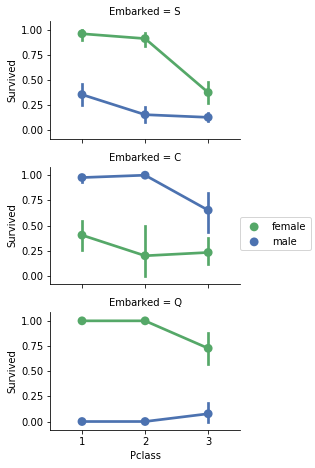

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**観察**

- 女性の乗客は、男性よりもはるかに良好な生存率を示した。(仮説1「女性(性別=女性)は生存していた可能性が高い」を実証した）
- 例外的にEmbarked=Cでは男性の生存率が高い。これは、PclassとEmbarkedとの相関性であり、Pclassの影響が高く、必ずしもEmbarkedとSurvivedの間に直接的な相関関係があるとは言えない。
- Q港でPclass=2と比較した場合、男性はPclass=3でより良い生存率を示した。(Survivvedまたは他の重要な特徴量と相関する可能性があるため、Embarkedの欠損値を補完する必要があるかもしれない）
- 乗船港によって、男性でPclass-3の生存率が異なる。（仮説「各特徴量がどのようにSurvivedに相関しているか知りたい）

**結論**

- モデルのトレーニングにSex特徴量を追加する。
- モデルのトレーニングにEmbarked特徴量を補完して追加する。

### カテゴリカル特徴量と数値特徴量の相関

数値以外の値を持つカテゴリカル特徴量と、数値特徴量を関連付けることもできる。今回は、Embarked(カテゴリカルで非数値)、Sex(カテゴリカルで非数値)、運賃(数値で連続値)の間で相関を分析できる。


/Users/ykazama/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


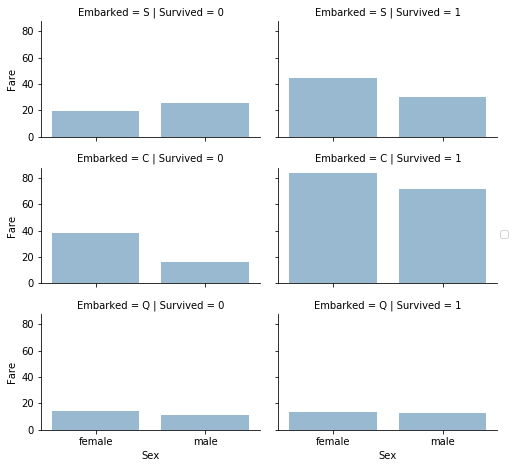

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**観察**

- より高い運賃を支払う乗客は、より良い生存率を示した。（仮説「Fareの範囲を特徴量として作成」)
- 乗船港は製造率と相関する。

**結論**

- Fare特徴量のバンディング(一定の区間で区切ってカテゴリカルにする)を検討する。

## データラングリング

これまで、データセットと問題要件に関するいくつかの仮説と結論を集めた。これまでは、単一の特徴量や値を変更して、これらに到達する必要はなかったが、これからは結論と仮説を実行して、特徴量を補完したり修正したり作成したりする。

### 特徴量を削除することで修正する

特徴量を削除することで、データポイントの数が減少し、分析をより楽にできる。

仮説と結論に基づいて、CabinとTicketの特徴量を削除する。

該当する項目では、トレーニングデータセットとテストデータセットの両方で操作を実行し、一貫性を保つ。

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

### 既存のものから新しい特徴量を作成する

NameとPassengerIdを削除する前に、NameからTitle(肩書)を超出し、TitleとSurvivedの相関関係を調べたい。

以下のコードでは、正規表現を使用してTitleを抽出する。正規表現パターン`(\w+\.)`は、Name特徴量内のドット文字で終わる最初の単語と一致する。expand=Falseフラグはパターンにマッチしたグループが1つの場合、Series(対象がSeriesのとき)がIndex(対象がIndexのとき)を返し、複数マッチした場合はDataframeを返す。デフォルトではTrueになっており、この場合は常にDataframeを返す。

**観察**

Title, Age, Survivedをプロットすると、次のような観測結果が得られる。

- ほとんどのTitleは、年齢層を正確に区別する。例：Masterの年齢平均は5歳。
- Title年齢層の生存率はわずかに異なる。
- 一部のTitleはほとんどが生き残った (Mme, Lady, Sir)か、そうでなかった (Don, Rev, Jonkheer)。

**結論**

- モデルトレーニングのために新しいTitle特徴量を保持することに決める。

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('(\w+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


あまり使われないTitleを「Rare」に置き換えたり、より一般的なTitle名に置き換える。

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


カテゴリカルなTitleを序数に変換する。

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


これで、トレーニングとテストデータセットからNameを安全に削除できる。また、生き残ったかどうかという問題とは関係がないため、トレーニングデータセットにPassengerIdを削除する。

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### カテゴリカル特徴量の変換

文字列を含む特徴量を数値に変換する。この操作は、ほとんどのモデルアルゴリズムで必要で、特徴量の補完を成し遂げることに貢献する。

Sex特徴量を、女性=1、男性=0という新しい特徴量に変換する。

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 連続的数値の特徴量を補完する

欠損値またはnull値をもつ特徴量を、その欠損値を推定して補完する必要がある。まず、Age特徴量で行う。

数値連続的特徴量を補完するには、3つの方法が考えられる。

1. 簡単な方法として、平均と標準偏差の間の乱数を生成する。

2. 欠損値を推測するより正確な方法は、他の相関する特徴量を使用することである。今回のケースでは、年齢、性別、およびPclassの間の相関を記録する。PclassとGenderの特徴量の組み合わせのセット全体でAgeの中央値を使用してAgeの値を推測する。Pclass=1、Gendear=0、Pclass=1、Gender=1などの中間の年齢などなど。

3. 方法1と2を組み合わせる。中央値に基づいて年齢値を推測する代わりに、PclassとGendearの組み合わせのセットに基づいて、平均と標準偏差の愛大になる乱数を使用する。

方法1と3はランダムノイズをモデルに導入することになり、複数回の実行毛化が異なる可能性がある。よって方法2を優先する。

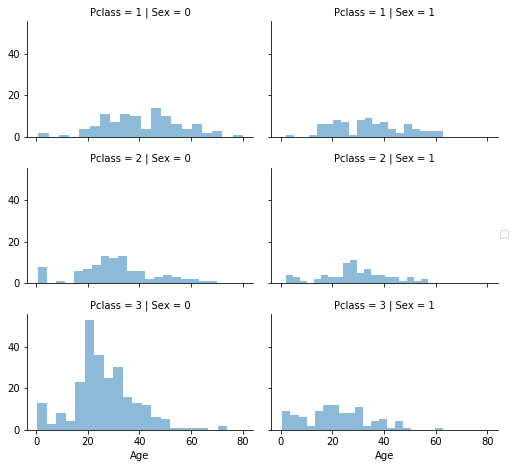

In [23]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Pclass x Genderの組み合わせに基づいて推測されたAge値を格納するため、空の配列を準備する。

In [24]:
guess_ages = np.zeros((2, 3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

今度は、Sex(0 or 1)とPclass(1, 2, 3)を繰り返し、6つの組み合わせのAgeの推測値を計算する。 

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            
            # Convert random age float to nearrest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                       'Age'] = guess_ages[i,j]
            
    dataset['Age'] = dataset['Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Ageの区間を作成し、Survivedとの相関を見る。

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


これらの区間に基づいて年齢を序数に置き換える。

In [27]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <=48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <=64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


AgeBand特徴量を削除する。

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 既存の特徴量を組み合わせて新しい特徴量を作成する

ParchとSibSpを組み合わせてFamilySizeとして新しい特徴量を作成する。これにより、データセットからParchとSibSpを削除できる。

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


isAloneというべつの特徴量を作成できる。

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


IsAloneが良さげなので、Parch、SibSp、およびFamilySize特徴量を削除する。

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


PclassとAgeを組み合わせた人工的な特徴量を作成できる。

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### カテゴリカル特徴量を補完する

Embarked特徴量は、乗船港に基づいてS, Q, Cの値を取る。トレーニングデータ・セットには2つの欠損値があるが、今回は最頻値を設定する。

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### カテゴリカル特徴量を吸う値に変換する

欠損値を補完したので、Embarked特徴量を数値に変換する。

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2})
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### クリック補完と数値特徴量の変換

この特徴量の最頻値（最も頻繁に搭乗する値）を使用して、テストデータセットの値が不足している場合に、Fare特徴量を補完できる。

> 補完する目的は、欠損値を埋めて、モデルアルゴリズムがある程度望ましい状態で動作すること。必要異常に欠損値の推測に時間をかける必要はない。

通貨を表しているので、運賃の小数点第二位以下を四捨五入する場合もある。

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


FareBand特徴量を作成することもできる。

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


FareBandに基づいてFare特徴量を序数に変換する。

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


テストセットは以下の通り。

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## モデルを作って予測する

以下のアルゴリズムを使う。

- ロジスティック回帰
- k-最近傍法
- サポートベクターマシン
- ナイーブベイズクラス分類器
- 決定木
- ランダムフォレスト
- パーセプトロン
- ニューラルネットワーク
- 関連ベクトルマシン

## データを読み込ませる準備

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train= train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

まずscikit-learnに読み込ませるために、訓練データとテストデータを用意する。以下のことに注意する。
- X_trainには、応答変数（答えとなる特徴量）を除いた予測変数（応答変数を予測するために使う特徴量のこと）を入れる。
- Y_trainには、応答変数のみを入れる。

X_testには、てs苞データを格納したデータフレームを入れる。X_trainとY_trainのデータを使って訓練したモデルが、訓練データの予測変数から応答変数を予測したときに、どの程度正解できるのかとうことが、このモデルの予測精度の推定になる。

> ここでは、大まかな流れを把握するということで、この予測精度を実際の予測精度の推定値としている。これは、正しいやり方ではない。訓練データを使って学習したモデルで訓練データを使って予測しているので、実際の予測精度よりも良い値が出るためである。一般的には交差検証という手法が用いられるが、ここでは交差検証は行わない。

### ロジスティック回帰

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.26

In [43]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"]  = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


In [45]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06